# Lecture 17: The Multilayer Perceptron
***

<img src="figs/nnbanner.png",width=1100,height=50>

**Reminder**: Scroll down and shift-enter the **Helper Functions** at the bottom of the notebook.  

### Problem 1: Automatic Features and Learning XOR 
***


Consider again the problem of learning $\texttt{XOR}$ using a two-layer perceptron model. The training set is as follows: 

$$
\begin{array}{c|cccc}
x_1 & 0 & 1 & 0 & 1 \\
\hline 
x_2 & 0 & 0 & 1 & 1 \\
\hline 
x_1 \texttt{ XOR } x_2 & 0 & 1 & 1 & 0 \\
\end{array}
$$

In the video lecture we found a two-layer perceptron with the following architecture 

<img src="figs/two_layer_perceptron.png",width=400,height=50>

and a set of weights and biases for the transition between each layer that accurately captured the $\texttt{XOR}$ operator.  In this problem we consider slightly different weights, which also accurately capture $\texttt{XOR}$. 

$$
W^1 = \left[
\begin{array}{rr}
1 & 1 \\
-1 & -1 
\end{array}
\right], 
\quad
{\bf b}^1 = \left[
\begin{array}{r}
-0.5 \\
1.5 
\end{array}
\right], 
\quad
W^2 = \left[
\begin{array}{rr}
1 & 1 
\end{array}
\right], \quad
{\bf b}^2 = \left[
\begin{array}{r}
-1.5 
\end{array}
\right]
$$


**Q**: One interpretation of the hidden layer activations is that they represent new features derived from the inputs that are learned automatically by the artificial network.  Compute the activations in the hidden layer for each training example and explain why these activations, interpreted as derived features, leads to a linearly separable set of points in feature space. 




### Problem 2: A Multilayer Perceptron for Multiclass Classification
***

Consider finding a multilayer perceptron model to classify the following data into one of four classes: 

$$
\begin{array}{c|rrrrrrrrrr}
x_1 & 0 & 0 & 1 & 2 & 0 & 1  & -1& -2&  \\
\hline 
x_2 & 1 & 2 & 0 & 1 & -1& -2 &  0& -1&  \\
\hline 
y & 0 & 0 & 1 & 1 & 2 &  2&  3 &  3&  \\
\end{array}
$$

The data can be seen here where distinct colors represent the different class labels 

In [ ]:
X = np.array([[0,1],[0,2],[1,0],[2,1],[0,-1],[1,-2],[-1,0],[-2,-1]])
y = np.array([0,0,1,1,2,2,3,3])
prob2plot(X, y)

**Q**: How many nodes does the MLP have in the input layer? 

**Q**: How many nodes does the MLP have in the output layer? 

**Q**: What is the minimal MLP architecture that you think can correctly classify this data set?  

In this problem you will determine (mostly through intuition) the weights and the biases necessary to classify this data set using the following MLP architecture:

<img src="figs/MLP4ClassSmall.png",width=400,height=50>

**Q**: What are the dimensions of the weight matrices and biases $W^1$, ${\bf b}^1$, $W^2$, ${\bf b}^2$? 

**Q**: OK, now the fun part.  Determine weights and biases $W^1$, ${\bf b}^1$, $W^2$, ${\bf b}^2$ that will yield an MLP that correctly classifies the data set.  To help, I've given you some starter code and an MLP class that does the forward propagation and makes predictions about classes.  Before making any guesses, look through the code and make sure you understand how it works! 

In [8]:
W = []
b = []
W1 = np.array() #TODO 
W.append(W1)
b1 = np.array() #TODO
b.append(b1)
W2 = np.array() #TODO 
W.append(W2)
b2 = np.array() #TODO
b.append(b2)

In [15]:
class MLP:
    def __init__(self,W,b):
        self.W = W
        self.b = b 
        
    def activation(self,z):
        """
        Applies the element-wise indicator function I(z > 0)
        """
        return (z>0).astype(int)
    
    def feedforward(self, X):
        """
        Uses the provided weights and biases to feed forward
        examples in X and make predictions.  Returns numpy
        array yhat 
        """
        yhat = np.zeros(X.shape[0])
        for kk in xrange(X.shape[0]):
            a = X[kk,:]
            for ll in xrange(2):
                z = np.dot(self.W[ll], a) + self.b[ll]
                a = self.activation(z)
            yhat[kk] = np.argmax(a)
        return yhat.astype(int) 
    
    def plotDecisionBoundary(self, X=None, y=None):
        """
        Function to plot the decision boundary produced by 
        your MLP model.  X and y are optional data matrix 
        and label vector to overlay original data
        """
        mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373", "gray": "gray"}
        colorlist = [c for (n,c) in mycolors.items()]
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111) 
            
        xline = np.linspace(-3,3,50) 
        yline = np.linspace(-3,3,50) 
        Xd = np.array([[xk, yk] for xk in xline for yk in yline])
        
        yhat = self.feedforward(Xd)
        cd = [colorlist[yk] for yk in yhat]
        plt.scatter(Xd[:,0], Xd[:,1], color=cd, s=25, alpha=0.5)
        
        if not(X is None and y is None): 
            colors = [colorlist[yk] for yk in y]
            plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
        
        ax.xaxis.grid(True, color="gray", ls='-')
        ax.yaxis.grid(True, color="gray", ls='-')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        plt.xticks([-3,-2,-1,0,1,2,3], fontsize=16)
        plt.yticks([-3,-2,-1,0,1,2,3], fontsize=16)
        ax.tick_params(axis=u'both', which=u'both',length=0)
        plt.xlim([-3.5,3.5])
        plt.ylim([-3.5,3.5])


In [ ]:
myMLP = MLP(W, b)
yhat = myMLP.feedforward(X)
print yhat

**Q**: Once you're satisfied that your MLP is correctly classifying the 8 data points, call the $\texttt{plotDecisionBoundary}$ method to print a rough estimate of the decision boundary of your classifier.  Does it look like you expect?  Why or why not?  

In [ ]:
myMLP.plotDecisionBoundary(X,y)

### Problem 3: TensorFlow Playground 
***

Go <a href="http://playground.tensorflow.org/"> here</a> and fiddle with things! 


<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

## Notebook Solutions

<br><br><br><br>


### Problem 1: Automatic Features and Learning XOR 
***


Consider again the problem of learning $\texttt{XOR}$ using a two-layer perceptron model. The training set is as follows: 

$$
\begin{array}{c|cccc}
x_1 & 0 & 1 & 0 & 1 \\
\hline 
x_2 & 0 & 0 & 1 & 1 \\
\hline 
x_1 \texttt{ XOR } x_2 & 0 & 1 & 1 & 0 \\
\end{array}
$$

In the video lecture we found a two-layer perceptron with the following architecture 

<img src="figs/two_layer_perceptron.png",width=400,height=50>

and a set of weights and biases for the transition between each layer that accurately captured the $\texttt{XOR}$ operator.  In this problem we consider slightly different weights, which also accurately capture $\texttt{XOR}$. 

$$
W^1 = \left[
\begin{array}{rr}
1 & 1 \\
-1 & -1 
\end{array}
\right], 
\quad
{\bf b}^1 = \left[
\begin{array}{r}
-0.5 \\
1.5 
\end{array}
\right], 
\quad
W^2 = \left[
\begin{array}{rr}
1 & 1 
\end{array}
\right], \quad
{\bf b}^2 = \left[
\begin{array}{r}
-1.5 
\end{array}
\right]
$$


**Q**: One interpretation of the hidden layer activations is that they represent new features derived from the inputs that are learned automatically by the artificial network.  Compute the activations in the hidden layer for each training example and explain why these activations, interpreted as derived features, leads to a linearly separable set of points in feature space. 




**A**: To get the hidden layer activations we need to multiply each input vector ${\bf x}_i$ by the weight matrix $W^1$ and add the corresponding bias vector ${\bf b}^1$, and finally, apply the indicator activation function.  We have 

$$
{\bf x}_1 = \left[
\begin{array}{r}
0 \\
0 
\end{array}
\right]
\rightarrow {\bf a}_1 
= 
\left[
\begin{array}{r}
0 \\
1 
\end{array}
\right]
\quad 
\quad 
{\bf x}_2 = \left[
\begin{array}{r}
1 \\
0 
\end{array}
\right]
\rightarrow {\bf a}_2 
= 
\left[
\begin{array}{r}
1 \\
1 
\end{array}
\right]
\quad 
\quad 
{\bf x}_3 = \left[
\begin{array}{r}
0 \\
1 
\end{array}
\right]
\rightarrow {\bf a}_3 
= 
\left[
\begin{array}{r}
1 \\
1 
\end{array}
\right]
\quad 
\quad 
{\bf x}_4 = \left[
\begin{array}{r}
1 \\
1 
\end{array}
\right]
\rightarrow {\bf a}_4 
= 
\left[
\begin{array}{r}
1 \\
0 
\end{array}
\right]
$$

If we plot the points (colored by their labels) in the original input space and in the activations feature space we get the following pictures

<img src="figs/XOR_features-1.png",width=600,height=50>

Notice that the data is not linearly separable in the original input space, but is in fact linear separable in the activations space.  Effectively, the second layer of the XOR MLP applies a simple single-perceptron model to these derived features and can easily come up with a separating hyperplane. 

### Problem 2: A Multilayer Perceptron for Multiclass Classification
***

Consider finding a multilayer perceptron model to classify the following data into one of four classes: 

$$
\begin{array}{c|rrrrrrrrrr}
x_1 & 0 & 0 & 1 & 2 & 0 & 1  & -1& -2&  \\
\hline 
x_2 & 1 & 2 & 0 & 1 & -1& -2 &  0& -1&  \\
\hline 
y & 0 & 0 & 1 & 1 & 2 &  2&  3 &  3&  \\
\end{array}
$$

The data can be seen here where distinct colors represent the different class labels 

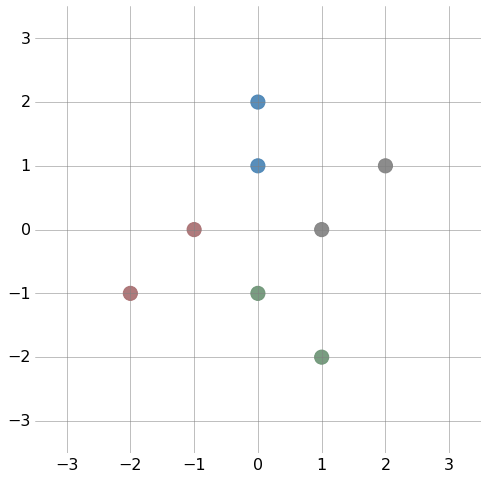

In [2]:
X = np.array([[0,1],[0,2],[1,0],[2,1],[0,-1],[1,-2],[-1,0],[-2,-1]])
y = np.array([0,0,1,1,2,2,3,3])
prob2plot(X, y)

**Q**: How many nodes does the MLP have in the input layer? 

**A**: Since the input examples are points in 2-dimensional space, the input layer has $2$ nodes. 

**Q**: How many nodes does the MLP have in the output layer? 

**A**: Since we're trying to predict membership in four classes our output layer should have four nodes.  We can then make predictions about a test example by choosing the class associated with the output node with the largest activation. 

**Q**: What is the minimal MLP architecture that you think can correctly classify this data set?  

**A**: The smallest architecture that I could come up with has one hidden layer with two nodes. 

In this problem you will determine (mostly through intuition) the weights and the biases necessary to classify this data set using the following MLP architecture:

<img src="figs/MLP4ClassSmall.png",width=400,height=50>

**Q**: What are the dimensions of the weight matrices and biases $W^1$, ${\bf b}^1$, $W^2$, ${\bf b}^2$? 

**A**: $W^1$ connects two input nodes to two hidden layer nodes, so it is $2 \times 2$ 

${\bf b}^1$ contains the biases associated with the two hidden layer nodes, so it has length $2$ 

$W^2$ connects two hidden layer nodes to four output nodes, so it is $4 \times 2$ 

${\bf b}^2$ contains the biases associated with the four output nodes, so it has length $4$ 

**Q**: OK, now the fun part.  Determine weights and biases $W^1$, ${\bf b}^1$, $W^2$, ${\bf b}^2$ that will yield an MLP that correctly classifies the data set.  To help, I've given you some starter code and an MLP class that does the forward propagation and makes predictions about classes.  Before making any guesses, look through the code and make sure you understand how it works! 

In [8]:
W = []
b = []
W1 = np.array([[1,1],[1,-1]])
W.append(W1)
b1 = np.array([0,0]) 
b.append(b1)
W2 = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
W.append(W2)
b2 = np.array([-1.,-.5,-.5,.5])
b.append(b2)

In [15]:
class MLP:
    def __init__(self,W,b):
        self.W = W
        self.b = b 
        
    def activation(self,z):
        """
        Applies the element-wise indicator function I(z > 0)
        """
        return (z>0).astype(int)
    
    def feedforward(self, X):
        """
        Uses the provided weights and biases to feed forward
        examples in X and make predictions.  Returns numpy
        array yhat 
        """
        yhat = np.zeros(X.shape[0])
        for kk in xrange(X.shape[0]):
            a = X[kk,:]
            for ll in xrange(2):
                z = np.dot(self.W[ll], a) + self.b[ll]
                a = self.activation(z)
            yhat[kk] = np.argmax(a)
        return yhat.astype(int) 
    
    def plotDecisionBoundary(self, X=None, y=None):
        """
        Function to plot the decision boundary produced by 
        your MLP model.  X and y are optional data matrix 
        and label vector to overlay original data
        """
        mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373", "gray": "gray"}
        colorlist = [c for (n,c) in mycolors.items()]
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111) 
            
        xline = np.linspace(-3,3,50) 
        yline = np.linspace(-3,3,50) 
        Xd = np.array([[xk, yk] for xk in xline for yk in yline])
        
        yhat = self.feedforward(Xd)
        cd = [colorlist[yk] for yk in yhat]
        plt.scatter(Xd[:,0], Xd[:,1], color=cd, s=25, alpha=0.5)
        
        if not(X is None and y is None): 
            colors = [colorlist[yk] for yk in y]
            plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
        
        ax.xaxis.grid(True, color="gray", ls='-')
        ax.yaxis.grid(True, color="gray", ls='-')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        plt.xticks([-3,-2,-1,0,1,2,3], fontsize=16)
        plt.yticks([-3,-2,-1,0,1,2,3], fontsize=16)
        ax.tick_params(axis=u'both', which=u'both',length=0)
        plt.xlim([-3.5,3.5])
        plt.ylim([-3.5,3.5])


In [16]:
myMLP = MLP(W, b)
yhat = myMLP.feedforward(X)
print yhat

[1 1 0 0 2 2 3 3]


**Q**: Once you're satisfied that your MLP is correctly classifying the 8 data points, call the $\texttt{plotDecisionBoundary}$ method to print a rough estimate of the decision boundary of your classifier.  Does it look like you expect?  Why or why not?  

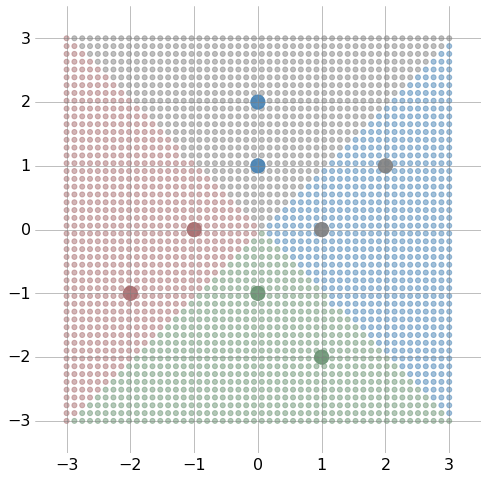

In [17]:
myMLP.plotDecisionBoundary(X,y)

<br><br><br><br>
<br><br><br><br>
<br><br><br><br>

### Helper Functions
***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def prob2plot(X, y):
    mycolors = {"blue": "steelblue", "red": "#a76c6e", "green": "#6a9373", "gray": "gray"}
    colorlist = [c for (n,c) in mycolors.items()]
    colors = [colorlist[yk] for yk in y ]
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111) 
    plt.scatter(X[:,0], X[:,1], color=colors, s=200, alpha=0.9)
    ax.xaxis.grid(True, color="gray", ls='-')
    ax.yaxis.grid(True, color="gray", ls='-')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks([-3,-2,-1,0,1,2,3], fontsize=16)
    plt.yticks([-3,-2,-1,0,1,2,3], fontsize=16)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    plt.xlim([-3.5,3.5])
    plt.ylim([-3.5,3.5])

from IPython.core.display import HTML
HTML("""
<style>
.MathJax nobr>span.math>span{border-left-width:0 !important};
</style>
""")